# LINEAR CONVOLUTION


In [3]:
import numpy as np
import matplotlib.pyplot as plt

# TASK 1:
- ## Program to compute linear convolution

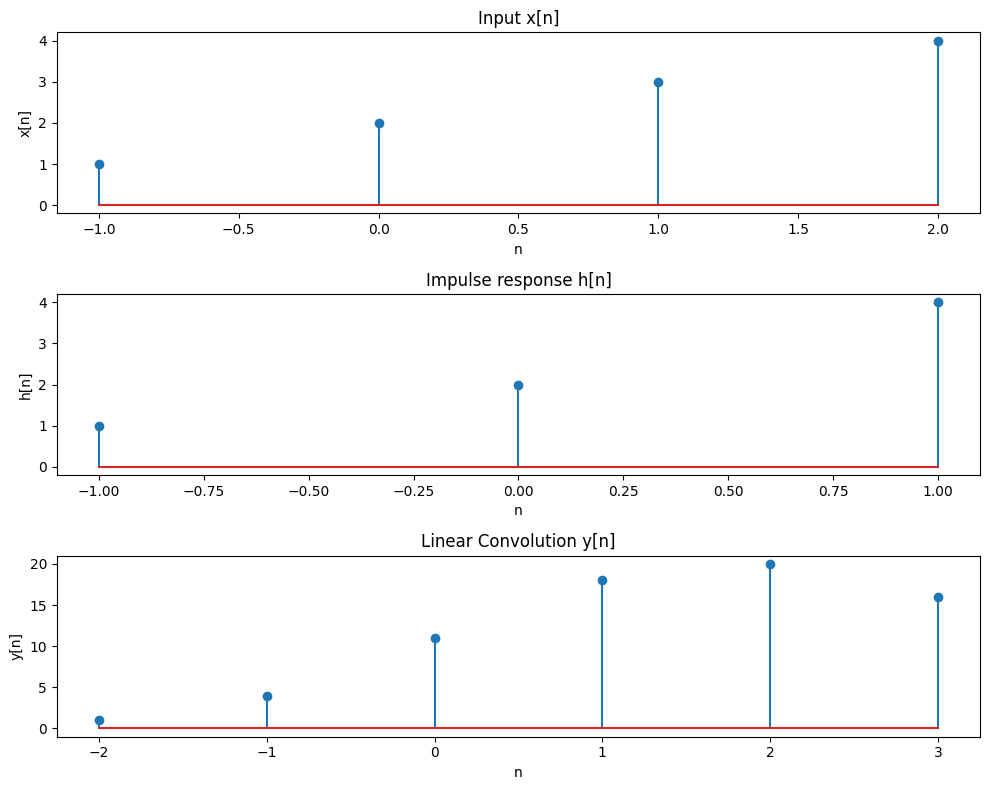

In [4]:
# Inputs
a = -1  # Starting point of x[n]
b = -1  # Starting point of h[n]
x = [1, 2, 3, 4]  # Elements of x[n]
h = [1, 2, 4]     # Elements of h[n]

# Performing linear convolution
y = np.convolve(x, h)

# Time axes for plotting
p = np.arange(a, a + len(x))
q = np.arange(b, b + len(h))
n = np.arange(a + b, a + b + len(y))

# Plotting
plt.figure(figsize=(10, 8))

# original signal
plt.subplot(3, 1, 1)
plt.stem(p, x)
plt.title("Input x[n]")
plt.xlabel("n")
plt.ylabel("x[n]")

# impulse response
plt.subplot(3, 1, 2)
plt.stem(q, h)
plt.title("Impulse response h[n]")
plt.xlabel("n")
plt.ylabel("h[n]")

# output of LTI System
plt.subplot(3, 1, 3)
plt.stem(n, y)
plt.title("Linear Convolution y[n]")
plt.xlabel("n")
plt.ylabel("y[n]")

plt.tight_layout()
plt.show()


# TASK 2:
- ## Program to compute circular linear convolution

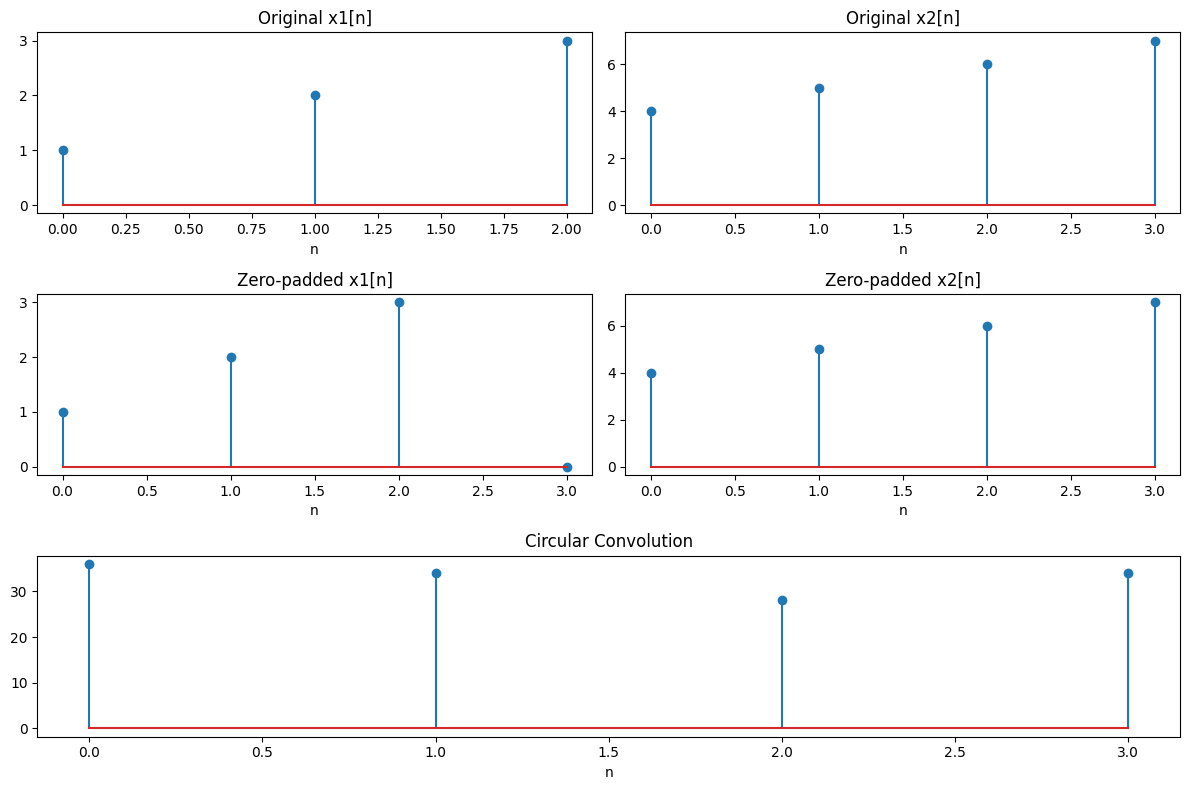

In [9]:
# Original sequences
x1 = [1, 2, 3]
x2 = [4, 5, 6, 7]

# Finding maximum length and zero-pad both sequences to same length
N = max(len(x1), len(x2))
x1_padded = np.concatenate([x1, np.zeros(N - len(x1))])
x2_padded = np.concatenate([x2, np.zeros(N - len(x2))])

# Performing circular convolution using FFT
X1 = np.fft.fft(x1_padded)
X2 = np.fft.fft(x2_padded)
Y = np.fft.ifft(X1 * X2)
y = np.real_if_close(Y)

# Time axes
n_original = np.arange(0, max(len(x1), len(x2)))
n_padded = np.arange(0, N)

# Plotting
plt.figure(figsize=(12, 8))

# Original sequences
plt.subplot(3, 2, 1)
plt.stem(range(len(x1)), x1)
plt.title("Original x1[n]")
plt.xlabel("n")

plt.subplot(3, 2, 2)
plt.stem(range(len(x2)), x2)
plt.title("Original x2[n]")
plt.xlabel("n")

# Padded sequences
plt.subplot(3, 2, 3)
plt.stem(n_padded, x1_padded)
plt.title("Zero-padded x1[n]")
plt.xlabel("n")

plt.subplot(3, 2, 4)
plt.stem(n_padded, x2_padded)
plt.title("Zero-padded x2[n]")
plt.xlabel("n")

# Circular convolution result
plt.subplot(3, 1, 3)
plt.stem(n_padded, y)
plt.title("Circular Convolution")
plt.xlabel("n")

plt.tight_layout()
plt.show()


# TASK 3:
- ## Digital filters:

### Butterworth LPF


Low-pass filter

Band-pass filter

High-pass (stop low) filter

Band-stop (stop band between fc1 and fc2)

In [10]:
from scipy.signal import butter, freqz

/var/folders/n8/qbmv6g7j6vd0tjr7352tnwsw0000gn/T/ipykernel_9430/1718468120.py:44: RuntimeWarning: divide by zero encountered in log10
  plt.plot(w_band, 20 * np.log10(abs(h_band)))
/var/folders/n8/qbmv6g7j6vd0tjr7352tnwsw0000gn/T/ipykernel_9430/1718468120.py:52: RuntimeWarning: divide by zero encountered in log10
  plt.plot(w_high, 20 * np.log10(abs(h_high)))


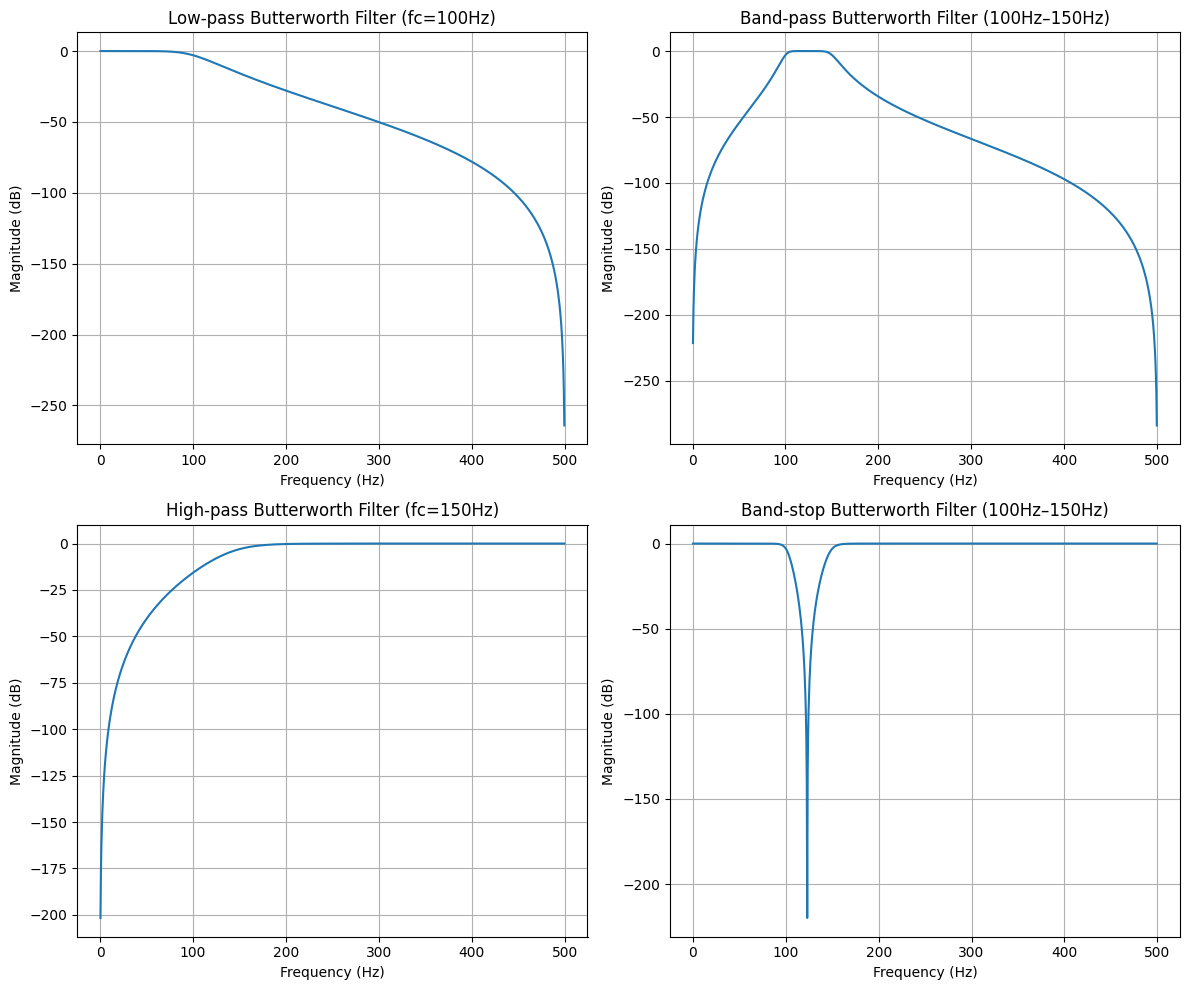

In [ ]:
# Sampling frequency and filter order
fs = 1000
order = 4

# Low-pass Butterworth filter 
fc = 100
wn_low = fc / (fs / 2)
b_low, a_low = butter(order, wn_low, btype='low')
w_low, h_low = freqz(b_low, a_low, worN=1024, fs=fs)

# Band-pass Butterworth filter 
fc1 = 100
fc2 = 150
wn_band = [fc1 / (fs / 2), fc2 / (fs / 2)]
b_band, a_band = butter(order, wn_band, btype='bandpass')
w_band, h_band = freqz(b_band, a_band, worN=1024, fs=fs)

# High-pass Butterworth filter 
fc_high = 150
wn_high = fc_high / (fs / 2)
b_high, a_high = butter(order, wn_high, btype='high')
w_high, h_high = freqz(b_high, a_high, worN=1024, fs=fs)

#  Band-stop Butterworth filter 
fc1_stop = 100
fc2_stop = 150
wn_stop = [fc1_stop / (fs / 2), fc2_stop / (fs / 2)]
b_stop, a_stop = butter(order, wn_stop, btype='bandstop')
w_stop, h_stop = freqz(b_stop, a_stop, worN=1024, fs=fs)

# Plotting
plt.figure(figsize=(12, 10))

# Low-pass
plt.subplot(2, 2, 1)
plt.plot(w_low, 20 * np.log10(abs(h_low)))
plt.title('Low-pass Butterworth Filter (fc=100Hz)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude (dB)')
plt.grid()

# Band-pass
plt.subplot(2, 2, 2)
plt.plot(w_band, 20 * np.log10(abs(h_band)))
plt.title('Band-pass Butterworth Filter (100Hz–150Hz)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude (dB)')
plt.grid()

# High-pass
plt.subplot(2, 2, 3)
plt.plot(w_high, 20 * np.log10(abs(h_high)))
plt.title('High-pass Butterworth Filter (fc=150Hz)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude (dB)')
plt.grid()

# Band-stop
plt.subplot(2, 2, 4)
plt.plot(w_stop, 20 * np.log10(abs(h_stop)))
plt.title('Band-stop Butterworth Filter (100Hz–150Hz)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude (dB)')
plt.grid()

plt.tight_layout()
plt.show()



# TASK 4:
- ## FIR Filter Windows




## plotting window functions


In [13]:
from scipy.signal.windows import hann, hamming, blackman, kaiser

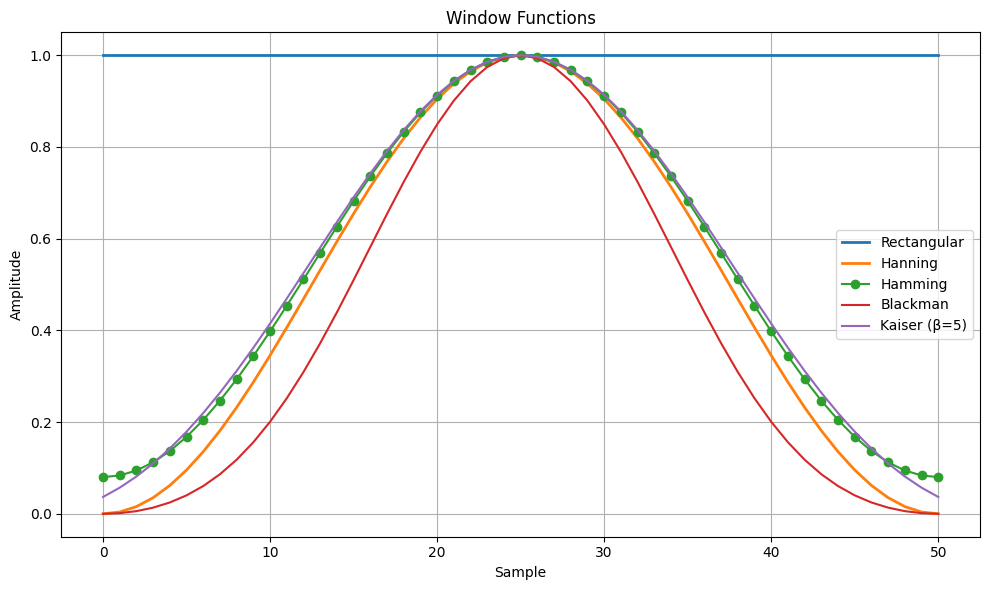

In [16]:
# Window length
N = 50
n = np.arange(0, N + 1)

# Generate window functions
rectangular = np.ones(N + 1)
hanning = hann(N + 1)
hamm = hamming(N + 1)
black = blackman(N + 1)
kais = kaiser(N + 1, beta=5)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(n, rectangular, label='Rectangular', linewidth=2)
plt.plot(n, hanning, label='Hanning', linewidth=2)
plt.plot(n, hamm, '-o', label='Hamming')
plt.plot(n, black, label='Blackman')
plt.plot(n, kais, label='Kaiser (β=5)')

plt.title('Window Functions')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


## FIR filter using windows


In [18]:
from scipy.signal import firwin, freqz
from numpy import kaiser

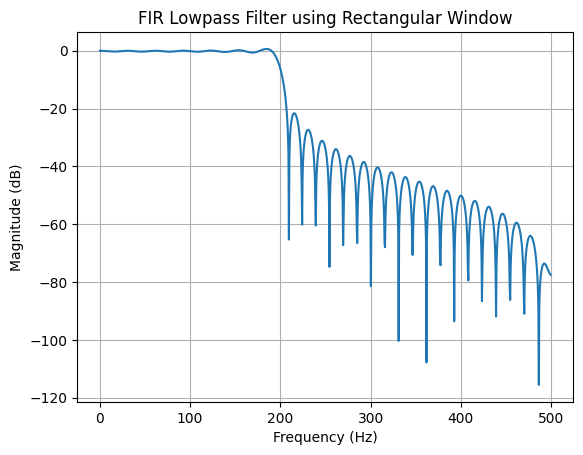

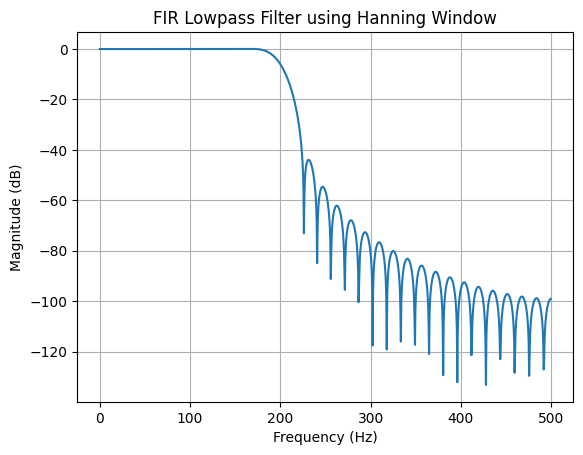

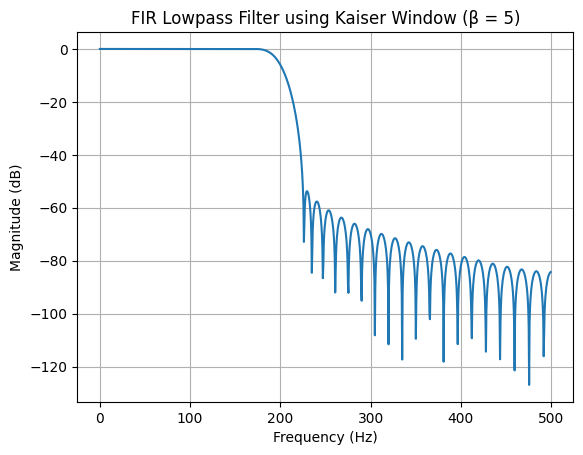

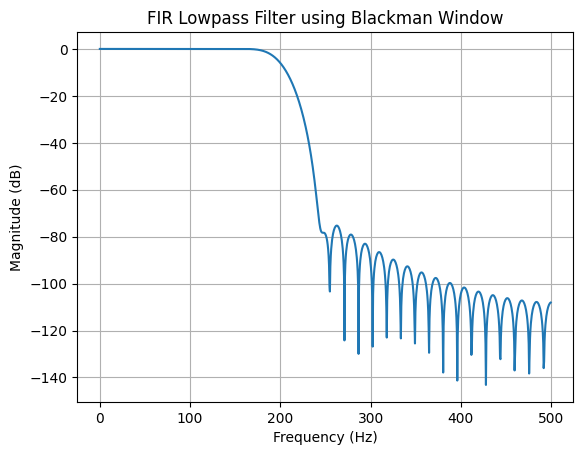

In [19]:
# Parameters
fs = 1000        # Sampling frequency
fc = 200         # Cutoff frequency
N = 64           # Filter order
wn = fc / (fs / 2)  # Normalized cutoff frequency (0 to 1)

# Frequency axis for plotting
w, h = freqz([1])  # dummy to get frequency axis only

# FIR with Rectangular window
b_rect = firwin(N + 1, wn, window='boxcar')
w, h = freqz(b_rect, worN=1024, fs=fs)
plt.figure()
plt.title('FIR Lowpass Filter using Rectangular Window')
plt.plot(w, 20 * np.log10(abs(h)))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude (dB)')
plt.grid()

# FIR with Hann window
b_hann = firwin(N + 1, wn, window='hann')
w, h = freqz(b_hann, worN=1024, fs=fs)
plt.figure()
plt.title('FIR Lowpass Filter using Hanning Window')
plt.plot(w, 20 * np.log10(abs(h)))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude (dB)')
plt.grid()

# FIR with Kaiser window (beta = 5)
b_kaiser = firwin(N + 1, wn, window=('kaiser', 5))
w, h = freqz(b_kaiser, worN=1024, fs=fs)
plt.figure()
plt.title('FIR Lowpass Filter using Kaiser Window (β = 5)')
plt.plot(w, 20 * np.log10(abs(h)))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude (dB)')
plt.grid()

# FIR with Blackman window
b_blackman = firwin(N + 1, wn, window='blackman')
w, h = freqz(b_blackman, worN=1024, fs=fs)
plt.figure()
plt.title('FIR Lowpass Filter using Blackman Window')
plt.plot(w, 20 * np.log10(abs(h)))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude (dB)')
plt.grid()

plt.show()
